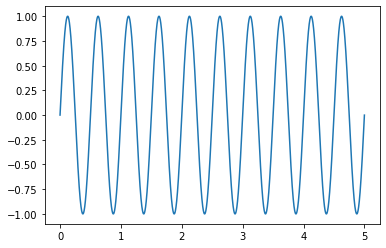

In [3]:
import numpy as np
from matplotlib import pyplot as plt

SAMPLE_RATE = 44100  # Hertz
DURATION = 5  # Seconds

def generate_sine_wave(freq, sample_rate, duration):
    x = np.linspace(0, duration, sample_rate * duration, endpoint=False)
    frequencies = x * freq
    # 2pi because np.sin takes radians
    y = np.sin((2 * np.pi) * frequencies)
    return x, y

# Generate a 2 hertz sine wave that lasts for 5 seconds
x, y = generate_sine_wave(2, SAMPLE_RATE, DURATION)
plt.plot(x, y)
plt.show()

In [38]:
_, nice_tone = generate_sine_wave(400, SAMPLE_RATE, DURATION)
_, noise_tone = generate_sine_wave(4000, SAMPLE_RATE, DURATION)
noise_tone = noise_tone * 0.3

mixed_tone = nice_tone + noise_tone

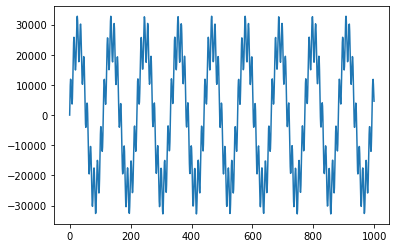

In [39]:
normalized_tone = np.int16((mixed_tone / mixed_tone.max()) * 32767)

plt.plot(normalized_tone[:1000])
plt.show()

220500
220500


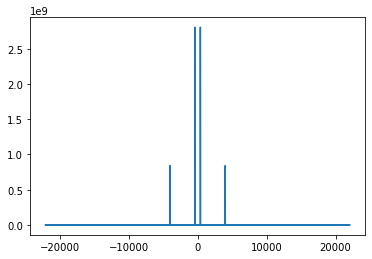

In [40]:
from scipy.fft import fft, fftfreq

# Number of samples in normalized_tone
N = SAMPLE_RATE * DURATION
print(N)
print(len(normalized_tone))
yf = fft(normalized_tone)
xf = fftfreq(N, 1 / SAMPLE_RATE)

plt.plot(xf, np.abs(yf))
plt.show()

In [6]:
#implementing FFT
yf = fft(normalized_tone)
xf = fftfreq(N, 1 / SAMPLE_RATE)

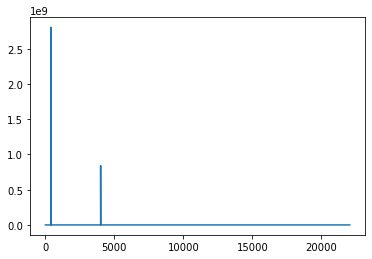

In [9]:
from scipy.fft import rfft, rfftfreq

# Note the extra 'r' at the front
yf = rfft(normalized_tone)
xf = rfftfreq(N, 1 / SAMPLE_RATE)

plt.plot(xf, np.abs(yf))
plt.show()

In [2]:
import pickle
import numpy as np
import math
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
import matplotlib as mpl
from sklearn.cluster import KMeans
import re
from sklearn.decomposition import PCA
from collections import *


file = open(r"C:\Users\Mahmo\Desktop\BCM_SIDS_ML_Summer_22\data\trials_breath.obj", "rb")
trials_breath = pickle.load(file)
file = open(r"C:\Users\Mahmo\Desktop\BCM_SIDS_ML_Summer_22\data\trials_ecg.obj", "rb")
trials_ecg = pickle.load(file)
file = open(r"C:\Users\Mahmo\Desktop\BCM_SIDS_ML_Summer_22\data\static_data.obj", "rb")
static_data = pickle.load(file)
file = open(r"C:\Users\Mahmo\Desktop\BCM_SIDS_ML_Summer_22\data\trials_raw.obj", "rb")
trials_raw = pickle.load(file)

In [50]:
trials_breath["M21488"]["breath"]

,Unnamed: 0,Mouse_And_Session_ID,Man_Condition,Breath Number,Timestamp_Inspiration,Timestamp_Expiration,Inspiratory_Duration,Irreg_Score_Inspiratory_Duration,Expiratory_Duration,Irreg_Score_Expiratory_Duration,...,Analysis_Parameter_TTwin,Analysis_Parameter_per500win,Analysis_Parameter_maxPer500,Analysis_Parameter_maxDVTV,Analysis_Parameter_minApSec,Analysis_Parameter_minApsTT,Analysis_Parameter_minAplTT,Analysis_Parameter_SIGHwin,Analysis_Parameter_SmoothFilt,trial_no
0,0,M21488,full_recording,18621,18.621,19.060,0.439,0.000000,0.543,0.000000,...,7,201,1.0,100,0.5,2,2,11,y,0
1,1,M21488,full_recording,19603,19.603,20.116,0.513,0.168565,0.551,0.014733,...,7,201,1.0,100,0.5,2,2,11,y,0
2,2,M21488,full_recording,20667,20.667,21.140,0.473,0.077973,0.547,0.007260,...,7,201,1.0,100,0.5,2,2,11,y,0
3,3,M21488,full_recording,21687,21.687,22.136,0.449,0.050740,0.522,0.045704,...,7,201,1.0,100,0.5,2,2,11,y,0
4,4,M21488,full_recording,22658,22.658,23.160,0.502,0.118040,0.450,0.137931,...,7,201,1.0,100,0.5,2,2,11,y,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11875,11875,M21488,full_recording,4452066,4452.066,4453.686,1.620,0.131285,0.476,0.020576,...,7,201,1.0,100,0.5,2,2,11,y,8
11876,11876,M21488,full_recording,4454162,4454.162,4455.297,1.135,0.299383,0.393,0.174370,...,7,201,1.0,100,0.5,2,2,11,y,8
11877,11877,M21488,full_recording,4455690,4455.690,4456.841,1.151,0.014097,1.606,3.086514,...,7,201,1.0,100,0.5,2,2,11,y,8
11878,11878,M21488,full_recording,4458447,4458.447,4458.634,0.187,0.837533,0.337,0.790162,...,7,201,1.0,100,0.5,2,2,11,y,8


In [24]:
trials_raw["M21488"]["raw"][18621:19603]

,Timestamp,Breathing_flow_signal,O2_sensor_data,CO2_sensor_data,Chamber_temperature,ECG,Heart_Rate,Integrated_Flow,Breathing,trial_no
36420,36.421001,-0.208750,2.087813,0.000000,35.0000,-0.000815,NaN,-7.272344,0.000146,0.0
36421,36.422001,-0.206563,2.087500,0.000937,34.6875,-0.000173,NaN,-7.272550,0.000137,0.0
36422,36.423000,-0.208750,2.087188,-0.000625,34.6875,0.000167,NaN,-7.272756,0.000137,0.0
36423,36.424000,-0.209375,2.087500,-0.000312,34.3750,-0.000424,NaN,-7.272970,0.000120,0.0
36424,36.424999,-0.213125,2.086875,-0.000312,35.0000,-0.000071,NaN,-7.273185,0.000112,0.0
...,...,...,...,...,...,...,...,...,...,...
37397,37.397999,-0.211875,2.087500,-0.000312,35.0000,0.000161,NaN,-7.467929,0.000172,0.0
37398,37.398998,-0.213125,2.087188,-0.000312,34.3750,-0.000428,NaN,-7.468144,0.000163,0.0
37399,37.400002,-0.215000,2.087813,-0.000312,34.6875,-0.000387,NaN,-7.468358,0.000163,0.0
37400,37.401001,-0.215937,2.087813,0.000000,35.3125,0.000280,NaN,-7.468581,0.000154,0.0


In [27]:
trials_raw["M21488"]["raw"]

,Timestamp,Breathing_flow_signal,O2_sensor_data,CO2_sensor_data,Chamber_temperature,ECG,Heart_Rate,Integrated_Flow,Breathing,trial_no
17799,17.799999,-0.213125,2.090625,-0.000312,35.0000,-0.000656,NaN,-3.593165,0.000120,0.0
17800,17.801001,-0.215000,2.090313,0.000000,34.6875,0.000577,NaN,-3.593380,0.000112,0.0
17801,17.802000,-0.215312,2.090937,-0.000312,34.6875,-0.000061,NaN,-3.593594,0.000112,0.0
17802,17.802999,-0.214375,2.090937,-0.000312,34.3750,-0.000072,NaN,-3.593809,0.000103,0.0
17803,17.804001,-0.214375,2.090625,0.000000,34.6875,-0.000398,NaN,-3.594024,0.000103,0.0
...,...,...,...,...,...,...,...,...,...,...
5063696,5063.745117,-0.204063,2.086562,0.008750,34.6875,-0.005134,NaN,-972.729797,-0.169361,8.0
5063697,5063.746094,-0.201250,2.085938,0.008438,34.6875,-0.003884,NaN,-972.729980,-0.169498,8.0
5063698,5063.747070,-0.202500,2.085625,0.008750,34.3750,-0.000446,NaN,-972.730225,-0.169704,8.0
5063699,5063.748047,-0.201875,2.085625,0.009062,34.6875,-0.002634,NaN,-972.730408,-0.169979,8.0


In [29]:
18621 + 17799
70.973	73.697	

36420

In [ ]:
from scipy.fft import rfft, rfftfreq

# Number of samples in normalized_tone
N = (37.402 - 36.420) * 1000
SAMPLE_RATE = 1000

signal = np.array(trials_raw["M21488"]["raw"]["Breathing_flow_signal"][18621:19603]) - np.mean(trials_raw["M21488"]["raw"]["Breathing_flow_signal"][18621:19603])

yf = rfft(signal)
xf = rfftfreq(math.ceil(N), 1 / SAMPLE_RATE)
plt.figure(figsize = (12,12))
plt.plot(xf, np.abs(yf))
plt.xlabel('Frequency in Hertz', size= 16)
plt.ylabel("Frequency Component Amplitude", size= 16)
plt.title("Fourier Transform of the Raw Signal", size= 16)

plt.figure(figsize = (12,12))
plt.plot(xf, np.abs(yf))
plt.xlim(0,40)
plt.xlabel('Frequency in Hertz', size= 16)
plt.ylabel("Frequency Component Amplitude", size= 16)
plt.title("Fourier Transform of the Raw Signal, Showing Frequencies 0 - 40 Hz", size= 16)

len(yf)

yf[35:] = 0

plt.plot(xf, np.abs(yf))
plt.show()

from scipy.fft import irfft

new_sig = irfft(yf)
print(new_sig[:10])
print(xf[:10])
plt.plot(new_sig[:1000])
plt.show()
plt.figure()
plt.plot(trials_raw["M21488"]["raw"]["Breathing_flow_signal"][18621:19603])

In [ ]:
from scipy.signal import butter, filtfilt

def butter_lowpass(cutoff, fs, order=5):
        nyq = 0.5 * fs
        cut = cutoff / nyq        
        a,b = butter(order, cut, analog=False, btype='low',output = 'ba')
        return a,b

def butter_bandpass_filter(data, cutoff, fs, order=5):
        a,b = butter_lowpass(cutoff, fs, order=order)
        y = filtfilt(a,b, data)
        return y

data = trials_raw["M21488"]["raw"]["Breathing_flow_signal"][18621:19603] - np.mean(trials_raw["M21488"]["raw"]["Breathing_flow_signal"][18621:19603])

def run(data):
    import numpy as np
    import matplotlib.pyplot as plt
    from scipy.signal import freqz

    # Sample rate and desired cutoff frequencies (in Hz).
    fs = 1000.0
    cutoff = 40

    plt.figure(figsize = (12,12))
    plt.plot(data, label='Raw signal')
    plt.title("Unfiltered signal", size = 16)
    plt.xlabel("Time (ms)", size = 16)
    plt.ylabel("Ventflow", size = 16)

    filtered_data = butter_bandpass_filter(data, cutoff, fs, order = 6)

    plt.figure(figsize = (12,12))
    plt.plot(filtered_data)
    plt.title("Lowpass Filtered Signal, Cutoff = {} Hz" .format(cutoff), size = 16)
    plt.xlabel("Time (ms)", size = 16)
    plt.ylabel("Ventflow", size = 16)

    return filtered_data

filtered_data = run(data)
    

In [ ]:
from scipy.signal import butter, filtfilt

def butter_lowpass(lowcutoff, highcutoff, fs, order=5):
        nyq = 0.5 * fs
        lowcutoff = lowcutoff / nyq        
        highcutoff = highcutoff / nyq
        a,b = butter(order, [lowcutoff, highcutoff], analog=False, btype='bandpass',output = 'ba')
        return a,b

def butter_bandpass_filter(data, lowcutoff, highcutoff, fs, order=5):
        a,b = butter_lowpass(lowcutoff, highcutoff, fs, order=order)
        y = filtfilt(a,b, data)
        return y

data = trials_raw["M21488"]["raw"]["Breathing_flow_signal"][18621:19603] - np.mean(trials_raw["M21488"]["raw"]["Breathing_flow_signal"][18621:19603])

def run(data):
    import numpy as np
    import matplotlib.pyplot as plt
    from scipy.signal import freqz

    # Sample rate and desired cutoff frequencies (in Hz).
    fs = 1000.0
    highcutoff = 40
    lowcutoff = 0.3
    plt.figure(figsize = (12,12))
    plt.plot(data, label='Raw signal')
    plt.title("Unfiltered signal", size = 16)
    plt.xlabel("Time (s)", size = 16)
    plt.ylabel("Ventflow", size = 16)

    filtered_data = butter_bandpass_filter(data, lowcutoff, highcutoff, fs, order =1)

    plt.figure(figsize = (12,12))
    plt.plot(filtered_data)
    plt.title("Bandpass Filtered Signal, Cutoffs = {} - {} Hz" .format(lowcutoff , highcutoff), size = 16)
    plt.xlabel("Time (s)", size = 16)
    plt.ylabel("Ventflow", size = 16)

    return filtered_data

filtered_data = run(data)
    

<class 'matplotlib.image.AxesImage'>
(864, 864, 4)
149.09027777777777


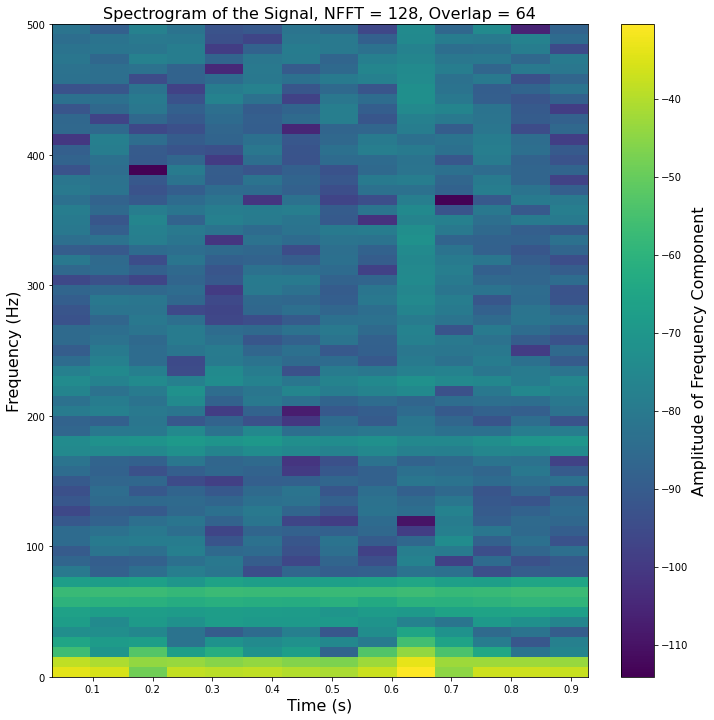

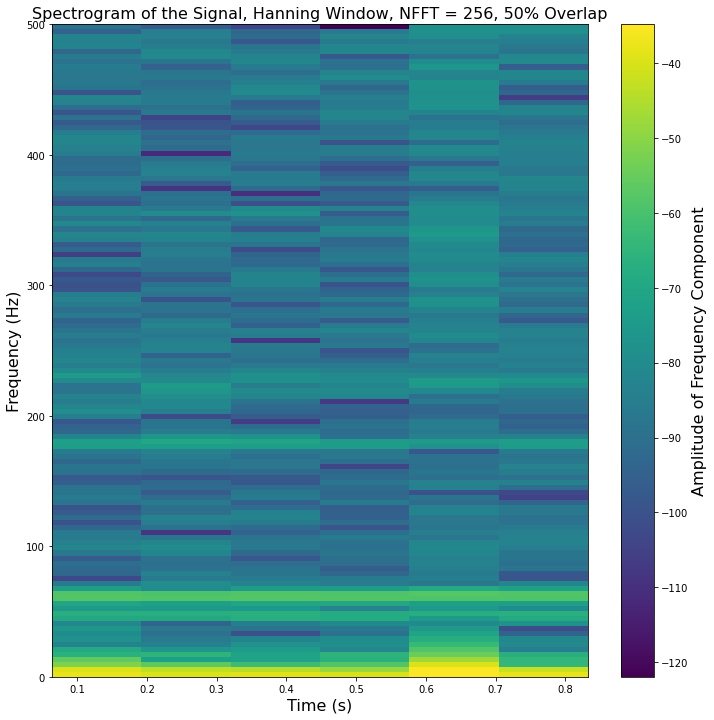

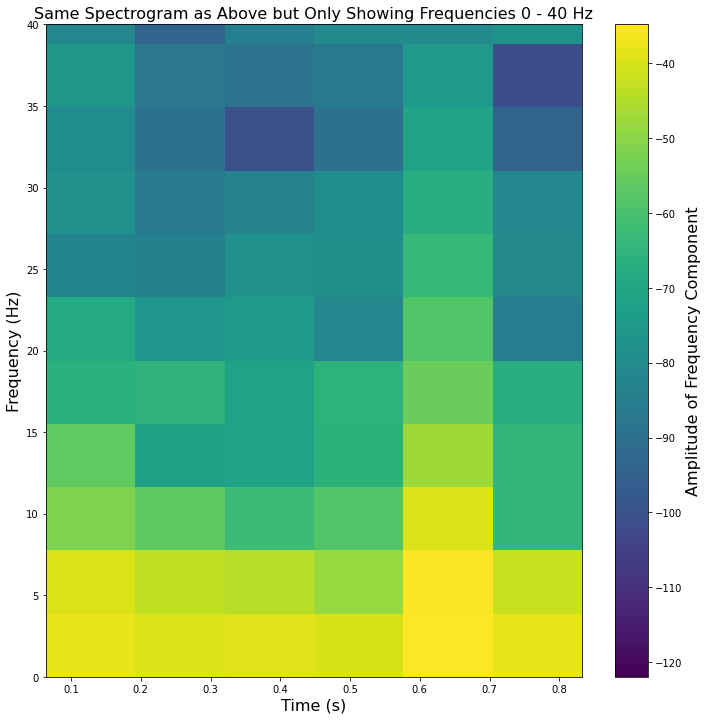

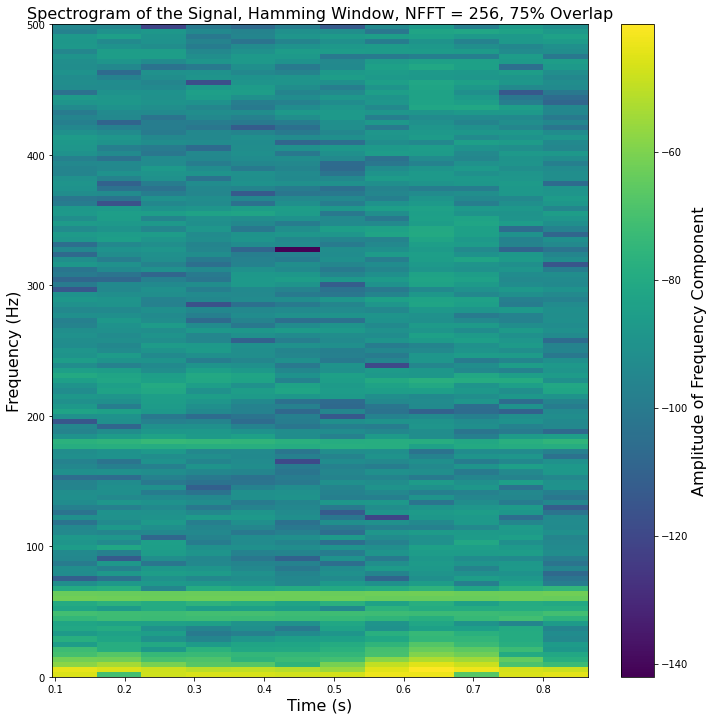

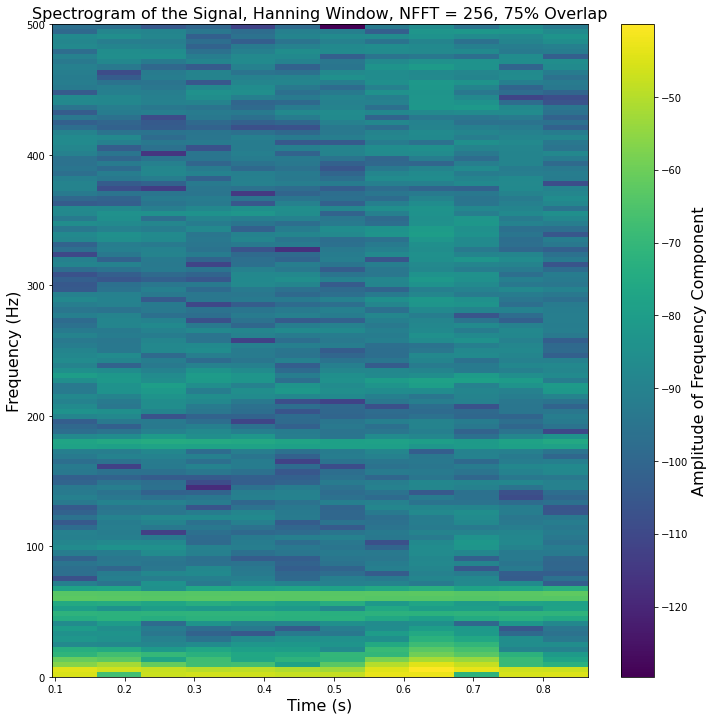

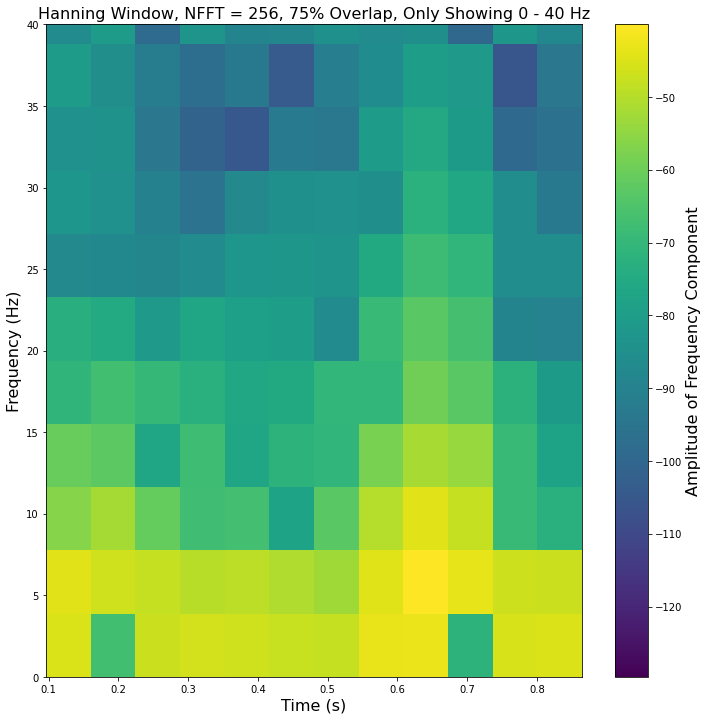

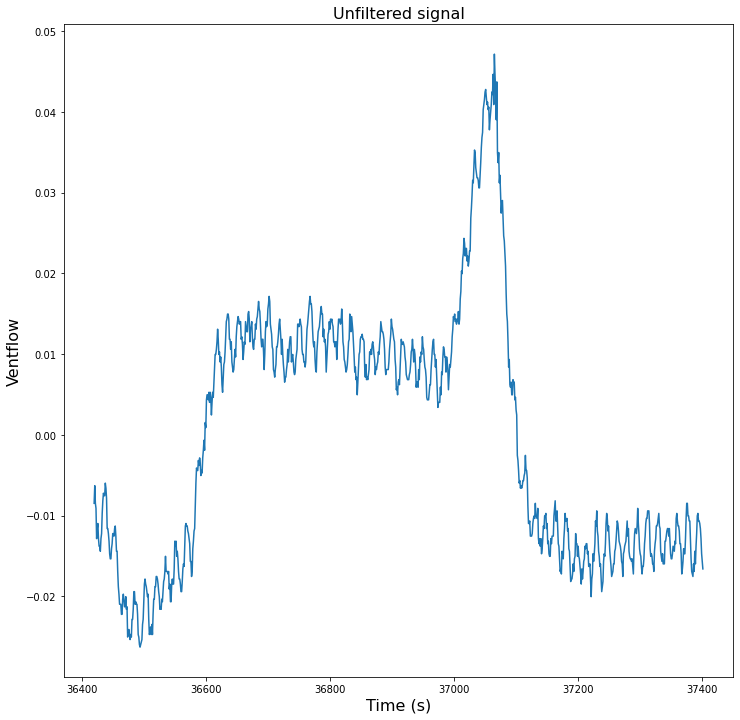

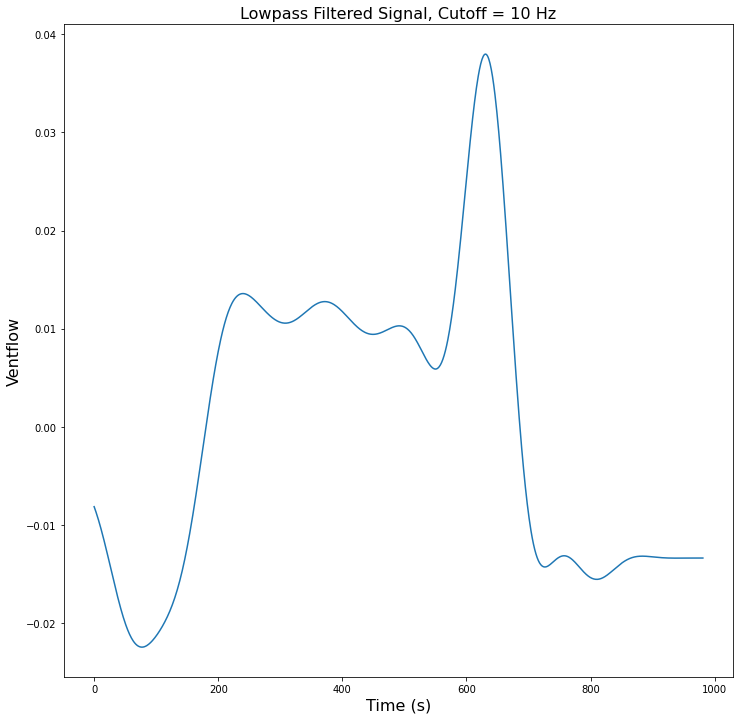

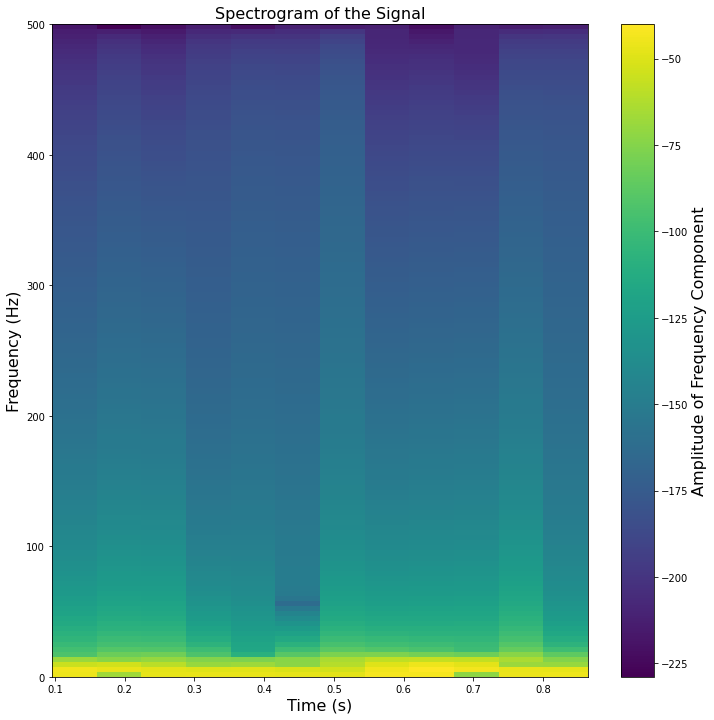

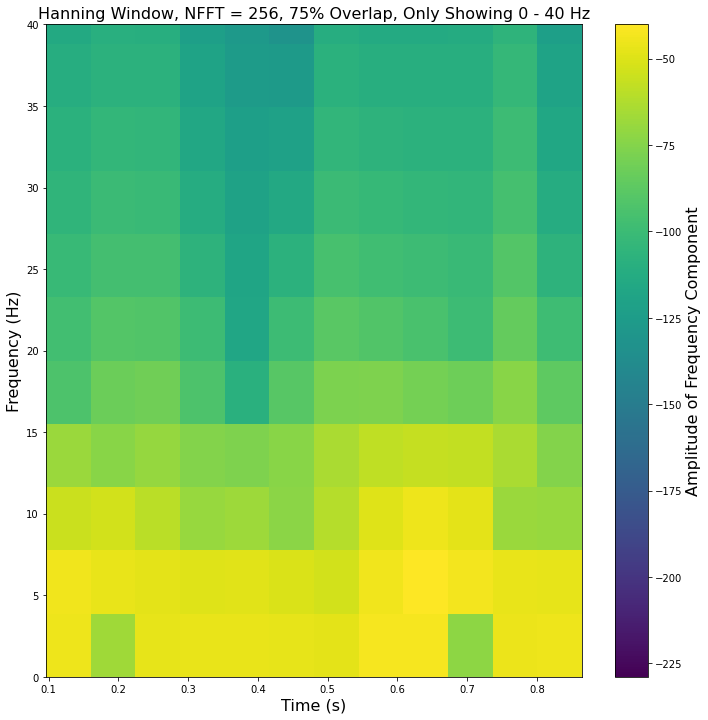

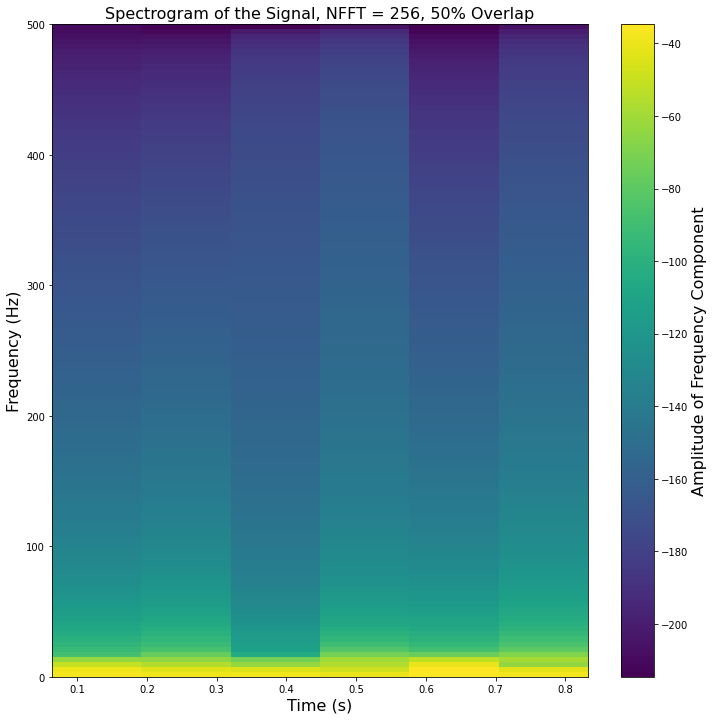

In [68]:
from PIL import Image
import io

plt.figure(figsize = (12,12))
spectrum, freqs, t, im = plt.specgram(data, Fs = 1000, mode = "magnitude", NFFT = 128, noverlap = 64)
plt.xlabel("Time (s)", size = 16)
plt.ylabel("Frequency (Hz)", size = 16)
cbar = plt.colorbar()
cbar.set_label('Amplitude of Frequency Component', rotation=90, size = 16)
plt.title("Spectrogram of the Signal, NFFT = 128, Overlap = 64", size = 16)


plt.figure(figsize = (12,12))
spectrum, freqs, t, im = plt.specgram(data, Fs = 1000, mode = "magnitude", NFFT = 256, noverlap = 128)
plt.xlabel("Time (s)", size = 16)
plt.ylabel("Frequency (Hz)", size = 16)
cbar = plt.colorbar()
cbar.set_label('Amplitude of Frequency Component', rotation=90, size = 16)
plt.title("Spectrogram of the Signal, Hanning Window, NFFT = 256, 50% Overlap", size = 16)

plt.figure(figsize = (12,12))
spectrum, freqs, t, im = plt.specgram(data, Fs = 1000, mode = "magnitude", NFFT = 256, noverlap = 128)
plt.xlabel("Time (s)", size = 16)
plt.ylabel("Frequency (Hz)", size = 16)
cbar = plt.colorbar()
plt.ylim(0,40)
cbar.set_label('Amplitude of Frequency Component', rotation=90, size = 16)
plt.title("Same Spectrogram as Above but Only Showing Frequencies 0 - 40 Hz", size = 16)

plt.figure(figsize = (12,12))
spectrum, freqs, t, im = plt.specgram(data, Fs = 1000, window = np.hamming(256), mode = "psd", NFFT = 256, noverlap = 192)
plt.xlabel("Time (s)", size = 16)
plt.ylabel("Frequency (Hz)", size = 16)
cbar = plt.colorbar()
cbar.set_label('Amplitude of Frequency Component', rotation=90, size = 16)
plt.title("Spectrogram of the Signal, Hamming Window, NFFT = 256, 75% Overlap", size = 16)

plt.figure(figsize = (12,12))
spectrum, freqs, t, im = plt.specgram(data, Fs = 1000, mode = "psd", NFFT = 256, noverlap = 192)
plt.xlabel("Time (s)", size = 16)
plt.ylabel("Frequency (Hz)", size = 16)
cbar = plt.colorbar()
cbar.set_label('Amplitude of Frequency Component', rotation=90, size = 16)
plt.title("Spectrogram of the Signal, Hanning Window, NFFT = 256, 75% Overlap", size = 16)

plt.figure(figsize = (12,12))
spectrum, freqs, t, im = plt.specgram(data, Fs = 1000, mode = "psd", NFFT = 256, noverlap = 192)
plt.xlabel("Time (s)", size = 16)
plt.ylabel("Frequency (Hz)", size = 16)
plt.ylim(0,40)
cbar = plt.colorbar()
cbar.set_label('Amplitude of Frequency Component', rotation=90, size = 16)
plt.title("Hanning Window, NFFT = 256, 75% Overlap, Only Showing 0 - 40 Hz", size = 16)

data = trials_raw["M21488"]["raw"]["Breathing_flow_signal"][18621:19603] - np.mean(trials_raw["M21488"]["raw"]["Breathing_flow_signal"][18621:19603])

filtered_data = run(data)

plt.figure(figsize = (12,12))
spectrum, freqs, t, im = plt.specgram(filtered_data, Fs = 1000, mode = "psd", NFFT = 256, noverlap = 192)
plt.xlabel("Time (s)", size = 16)
plt.ylabel("Frequency (Hz)", size = 16)
cbar = plt.colorbar()
cbar.set_label('Amplitude of Frequency Component', rotation=90, size = 16)
plt.title("Spectrogram of the Signal", size = 16)

plt.figure(figsize = (12,12))
spectrum, freqs, t, im = plt.specgram(filtered_data, Fs = 1000, mode = "psd", NFFT = 256, noverlap = 192)
plt.xlabel("Time (s)", size = 16)
plt.ylabel("Frequency (Hz)", size = 16)
plt.ylim(0,40)
cbar = plt.colorbar()
cbar.set_label('Amplitude of Frequency Component', rotation=90, size = 16)
plt.title("Hanning Window, NFFT = 256, 75% Overlap, Only Showing 0 - 40 Hz", size = 16)

plt.figure(figsize = (12,12))
spectrum, freqs, t, im = plt.specgram(filtered_data, Fs = 1000, mode = "magnitude", NFFT = 256, noverlap = 128)
plt.xlabel("Time (s)", size = 16)
plt.ylabel("Frequency (Hz)", size = 16)
cbar = plt.colorbar()
cbar.set_label('Amplitude of Frequency Component', rotation=90, size = 16)
plt.title("Spectrogram of the Signal, NFFT = 256, 50% Overlap", size = 16)

print(type(im))

sp_array = np.asarray(im)

with io.BytesIO() as buffer:
    plt.savefig(buffer, format = "png")
    buffer.seek(0)
    image = Image.open(buffer)
    ar = np.asarray(image)

print(ar.shape)

averaged_ar = np.average(ar, axis = 2)

print(np.average(averaged_ar[:,160]))

In [14]:
filtered_data = run(data)

In [60]:
500/288

1.7361111111111112